# Final Exam
### Guanda Jiang
### USC ID: 2837333230
### Section: Tuesday Section

In [248]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import AdaBoostClassifier

In [249]:
import warnings
warnings.filterwarnings("ignore")

# Following the Instruction

**Q1**

**a)**

In [250]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [251]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**First statement: More than 75% passengers did not travel with parents or children**

In [252]:
len(train['Parch'].loc[train['Parch'] == 0])/train.shape[0]

0.7609427609427609

**Answer: True**

**Second statement: 30 to 33% of passengers had siblings and/or spouse aboard**

In [253]:
len(train['SibSp'].loc[train['SibSp'] != 0])/train.shape[0]

0.3176206509539843

**Answer: True**

**Third statement: Less than 1% of passengers paid a fare as high as 500 dollars**

In [254]:
len(train['Fare'].loc[train['Fare'] >= 500])/train.shape[0]

0.003367003367003367

**Answer: True**

**Forth statement: Less than 1% of passengers are 65+ years old**

In [255]:
len(train['Age'].loc[train['Age'] >= 65])/train.shape[0]

0.012345679012345678

**Answer: False**

**b)**

In [256]:
train = train.drop(columns = ['PassengerId','Name', 'Ticket', 'Cabin'])
test = test.drop(columns = ['Name', 'Ticket', 'Cabin'])
alldata = [train, test]

In [257]:
for df in alldata:
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
    df['Fare'] = df['Fare'].fillna(df['Fare'].median())
    df['Sex'] = df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [258]:
age_list = []
for df in alldata:
    median_age = np.zeros((2,3))
    for i in range(0,2):
        for j in range(0,3):
            age = df.loc[(df['Sex'] == i) & 
                         (df['Pclass'] == j+1)]['Age'].median()
            median_age[i,j] = age
    age_list.append(median_age)

In [259]:
age_list

[array([[40. , 30. , 25. ],
        [35. , 28. , 21.5]]),
 array([[42., 28., 24.],
        [41., 24., 22.]])]

In [260]:
for df in alldata:
    for i in range(0,2):
        for j in range(0,3):
            df.loc[(df['Age'].isnull()) & (df['Sex'] == i) 
                   & (df['Pclass'] == j+1),\
                        'Age'] = age_list[i][i,j]

In [261]:
train.isnull().sum().max()

0

In [262]:
test.isnull().sum().max()

0

**c)**

In [263]:
for df in alldata:    
    df.loc[ df['Age'] <= 16, 'Age'] = 0
    df.loc[(df['Age'] > 16) & (df['Age'] <= 32), 'Age'] = 1
    df.loc[(df['Age'] > 32) & (df['Age'] <= 48), 'Age'] = 2
    df.loc[(df['Age'] > 48) & (df['Age'] <= 64), 'Age'] = 3
    df.loc[ df['Age'] > 64, 'Age'] = 4

In [264]:
for df in alldata:    
    df.loc[ df['Fare'] <= 7.9, 'Fare'] = 0
    df.loc[(df['Fare'] > 7.9) & (df['Fare'] <= 14.5), 'Fare'] = 1
    df.loc[(df['Fare'] > 14.5) & (df['Fare'] <= 31), 'Fare'] = 2
    df.loc[(df['Fare'] > 31) & (df['Fare'] <= 600), 'Fare'] = 3

In [265]:
for df in alldata: 
    df['Size'] = df['SibSp'] + df['Parch']

In [266]:
train = train.drop(columns = ['SibSp','Parch'])
test = test.drop(columns = ['SibSp','Parch'])

In [267]:
alldata = [train, test]

for df in alldata:
    df['Alone'] = 0
    df.loc[df['Size'] == 0, 'Alone'] = 1

In [268]:
for df in alldata:
    df[['Pclass','Sex','Age','Fare','Alone']] = df[
        ['Pclass','Sex','Age','Fare','Alone']].astype(str)

In [269]:
train_dum = pd.get_dummies(
    train, columns = train.loc[
        :,train.dtypes == 'object'].columns, drop_first = True)
test_dum = pd.get_dummies(
    test, columns = test.loc[
        :,test.dtypes == 'object'].columns, drop_first = True)

**d)**

In [270]:
y = train_dum['Survived']
X = train_dum.drop(columns = 'Survived')

In [271]:
X_train,X_test,y_train,y_test = train_test_split(
    X,y,stratify = y,random_state = 0)

**KNN**

In [60]:
# since KNN cannot be fitted by binary values
# let's use some meaningful features

X_knn = train[['Pclass','Age','Fare','Size']]

In [61]:
X_train_knn,X_test_knn,y_train_knn,y_test_knn = train_test_split(
    X_knn,y,stratify = y,random_state = 0)

In [62]:
# scale the X_knn
scaler = MinMaxScaler().fit(X_knn)
X_train_scale = scaler.transform(X_train_knn)
X_test_scale = scaler.transform(X_test_knn)

In [63]:
model = KNeighborsClassifier()
params = {'n_neighbors':[i for i in range(3,15)]}
grid = GridSearchCV(model,param_grid = params, cv = 5)
grid.fit(X_train_scale,y_train_knn)
print(grid.best_params_)
y_pred = grid.predict(X_test_scale)
accuracy_score(y_test_knn,y_pred)

{'n_neighbors': 13}


0.695067264573991

**SVC**

In [202]:
model = SVC()
params = {'C':[0.001,0.01,0.1,1,10], 
          'gamma':[0.001,0.01,0.1,1,10]}
grid_svc = GridSearchCV(model,param_grid = params, cv = 5)
grid_svc.fit(X_train,y_train)
print(grid_svc.best_params_)
y_pred = grid_svc.predict(X_test)
accuracy_score(y_test,y_pred)

{'C': 10, 'gamma': 0.1}


0.8116591928251121

**Logistic Regression**

In [65]:
model = LogisticRegression(solver='lbfgs', random_state = 0)
params = {'C':[0.001,0.01,0.1,1,10]}
grid_lr = GridSearchCV(model,param_grid = params, cv = 5)
grid_lr.fit(X_train,y_train)
print(grid_lr.best_params_)
y_pred = grid_lr.predict(X_test)
accuracy_score(y_test,y_pred)

{'C': 0.1}


0.7982062780269058

**Random Forest**

In [66]:
model = RandomForestClassifier(random_state = 0)
params = {'n_estimators':[100,200,300,400,500],
    'max_features':['auto','sqrt'], 
          'max_depth':[i for i in range(3,8)]}
grid_rf = GridSearchCV(model,param_grid = params, cv = 5)
grid_rf.fit(X_train,y_train)
print(grid_rf.best_params_)
y_pred = grid_rf.predict(X_test)
accuracy_score(y_test,y_pred)

{'max_depth': 4, 'max_features': 'auto', 'n_estimators': 200}


0.7937219730941704

**Gradient Boosting**

In [67]:
model = GradientBoostingClassifier(random_state = 0)
params = {'n_estimators':[100,200,300,400,500],
    'learning_rate': [0.001,0.01,0.1,1,10],
          'max_features':['auto', 'sqrt'], 
          'max_depth':[i for i in range(3,8)]}
grid_gb = GridSearchCV(model,param_grid = params, cv = 5)
grid_gb.fit(X_train,y_train)
print(grid_gb.best_params_)
y_pred = grid_gb.predict(X_test)
accuracy_score(y_test,y_pred)

{'learning_rate': 0.001, 'max_depth': 6, 'max_features': 'auto', 'n_estimators': 400}


0.7757847533632287

### Try Extra Algorithms

**DecisionTree Classifier**

In [68]:
model = DecisionTreeClassifier(random_state = 0)
params = {'max_features':['auto', 'sqrt'], 
          'max_depth':[i for i in range(3,10)]}
grid_dt = GridSearchCV(model,param_grid = params, cv = 5)
grid_dt.fit(X_train,y_train)
print(grid_dt.best_params_)
y_pred = grid_dt.predict(X_test)
accuracy_score(y_test,y_pred)

{'max_depth': 8, 'max_features': 'auto'}


0.8071748878923767

**Multi-layer Perceptron**

In [272]:
model = MLPClassifier(solver = 'lbfgs', random_state = 0)
params = {'hidden_layer_sizes': [(100,1),(100,2),(100,3),(100,4)],
         'activation': ['tanh', 'relu']}
grid_mlp = GridSearchCV(model,param_grid = params, cv = 5)
grid_mlp.fit(X_train,y_train)
print(grid_mlp.best_params_)

y_pred = grid_mlp.predict(X_test)
accuracy_score(y_test,y_pred)

{'activation': 'relu', 'hidden_layer_sizes': (100, 2)}


0.7802690582959642

**Predictions**

In [273]:
# Try MLP Classifier since it is a new approach
prediction = grid_mlp.predict(test_dum.drop(columns = 'PassengerId'))
result1 = pd.DataFrame({'Survived':prediction})
result1.index = test['PassengerId']
result1

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0
...,...
1305,0
1306,1
1307,0


In [90]:
result1.to_csv('submission.csv')

In [207]:
# SVC has the best performance, let's try to use it to predict
prediction = grid_svc.predict(test_dum.drop(columns = 'PassengerId'))

In [208]:
result2 = pd.DataFrame({'Survived':prediction})

In [209]:
result2.index = test['PassengerId']
result2

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,0
...,...
1305,0
1306,1
1307,0


In [115]:
result2.to_csv('submission.csv')

# Try other feature engineering methods

### Add polynomial terms

In [210]:
X_train['Size-s2'] = X_train['Size']**2
X_test['Size-s2'] = X_test['Size']**2

**SVC**

In [211]:
model = SVC()
params = {'C':[0.001,0.01,0.1,1,10], 
          'gamma':[0.001,0.01,0.1,1,10]}
grid_svc = GridSearchCV(model,param_grid = params, cv = 5)
grid_svc.fit(X_train,y_train)
print(grid_svc.best_params_)
y_pred = grid_svc.predict(X_test)
accuracy_score(y_test,y_pred)

{'C': 10, 'gamma': 0.01}


0.7937219730941704

**Logistic Regression**

In [212]:
model = LogisticRegression(solver='lbfgs', random_state = 0)
params = {'C':[0.001,0.01,0.1,1,10]}
grid_lr = GridSearchCV(model,param_grid = params, cv = 5)
grid_lr.fit(X_train,y_train)
print(grid_lr.best_params_)
y_pred = grid_lr.predict(X_test)
accuracy_score(y_test,y_pred)

{'C': 0.1}


0.8116591928251121

**Random Forest**

In [103]:
model = RandomForestClassifier(random_state = 0)
params = {'n_estimators':[100,200,300,400,500],
    'max_features':['auto','sqrt'], 
          'max_depth':[i for i in range(3,8)]}
grid_rf = GridSearchCV(model,param_grid = params, cv = 5)
grid_rf.fit(X_train,y_train)
print(grid_rf.best_params_)
y_pred = grid_rf.predict(X_test)
accuracy_score(y_test,y_pred)

{'max_depth': 5, 'max_features': 'auto', 'n_estimators': 300}


0.7847533632286996

**Decision Tree**

In [104]:
model = DecisionTreeClassifier(random_state = 0)
params = {'max_features':['auto', 'sqrt'], 
          'max_depth':[i for i in range(3,10)]}
grid_dt = GridSearchCV(model,param_grid = params, cv = 5)
grid_dt.fit(X_train,y_train)
print(grid_dt.best_params_)
y_pred = grid_dt.predict(X_test)
accuracy_score(y_test,y_pred)

{'max_depth': 3, 'max_features': 'auto'}


0.8071748878923767

**Prediction**

In [213]:
test_dum['Size-s2'] = test_dum['Size']**2

In [214]:
# Try Logistic Regression since it has the highest accuracy score 
# with polynomial term
prediction = grid_lr.predict(test_dum.drop(columns = 'PassengerId'))
result3 = pd.DataFrame({'Survived':prediction})
result3.index = test['PassengerId']
result3

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [108]:
result3.to_csv('submission.csv')

### Add one column Sex + Age

In [109]:
# Assume senior population may be more dangerous than young people
# and women may be more dangerous than men
# so this column may provide a tendency of survive

In [215]:
train['s&a'] = train['Sex']+train['Age']
test['s&a'] = test['Sex']+test['Age']

In [216]:
# encode column Embarked by 0,1,2
train['Embarked'] = train['Embarked'].map({'C': 0, 'Q': 1, 'S':2}).astype(int)

In [217]:
test['Embarked'] = test['Embarked'].map({'C': 0, 'Q': 1, 'S':2}).astype(int)

In [218]:
y = train['Survived']
X = train.drop(columns = 'Survived')

In [219]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.3,stratify=y,random_state=0)

**SVC**

In [220]:
model = SVC()
params = {'C':[0.001,0.01,0.1,1,10], 
          'gamma':[0.001,0.01,0.1,1,10]}
grid_svc = GridSearchCV(model,param_grid = params, cv = 5)
grid_svc.fit(X_train,y_train)
print(grid_svc.best_params_)
y_pred = grid_svc.predict(X_test)
accuracy_score(y_test,y_pred)

{'C': 1, 'gamma': 0.1}


0.8283582089552238

**Logistic Regression**

In [221]:
model = LogisticRegression(solver='lbfgs', random_state = 0)
params = {'C':[0.001,0.01,0.1,1,10]}
grid_lr = GridSearchCV(model,param_grid = params, cv = 5)
grid_lr.fit(X_train,y_train)
print(grid_lr.best_params_)
y_pred = grid_lr.predict(X_test)
accuracy_score(y_test,y_pred)

{'C': 10}


0.8208955223880597

**Random Forest**

In [155]:
model = RandomForestClassifier(random_state = 0)
params = {'n_estimators':[100,200,300,400,500],
    'max_features':['auto','sqrt'], 
          'max_depth':[i for i in range(3,8)]}
grid_rf = GridSearchCV(model,param_grid = params, cv = 5)
grid_rf.fit(X_train,y_train)
print(grid_rf.best_params_)
y_pred = grid_rf.predict(X_test)
accuracy_score(y_test,y_pred)

{'max_depth': 4, 'max_features': 'auto', 'n_estimators': 100}


0.8171641791044776

**Decision Tree**

In [159]:
model = DecisionTreeClassifier(random_state = 0)
params = {'max_features':['auto', 'sqrt'], 
          'max_depth':[i for i in range(3,10)]}
grid_dt = GridSearchCV(model,param_grid = params, cv = 5)
grid_dt.fit(X_train,y_train)
print(grid_dt.best_params_)
y_pred = grid_dt.predict(X_test)
accuracy_score(y_test,y_pred)

{'max_depth': 7, 'max_features': 'auto'}


0.7910447761194029

**MLP**

In [160]:
model = MLPClassifier(solver = 'lbfgs', random_state = 0)
params = {'hidden_layer_sizes': [(100,1),(100,2),(100,3),(100,4)],
         'activation': ['tanh', 'relu']}
grid_mlp = GridSearchCV(model,param_grid = params, cv = 5)
grid_mlp.fit(X_train,y_train)
print(grid_mlp.best_params_)

y_pred = grid_mlp.predict(X_test)
accuracy_score(y_test,y_pred)

{'activation': 'tanh', 'hidden_layer_sizes': (100, 2)}


0.7910447761194029

**Prediction**

In [222]:
# let's use SVC to predict
prediction = grid_svc.predict(test.drop(columns = 'PassengerId'))
result4 = pd.DataFrame({'Survived':prediction})
result4.index = test['PassengerId']
result4

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,0
...,...
1305,0
1306,1
1307,0


In [223]:
result4.to_csv('submission.csv')

# Try add 1 to column Size

In [165]:
# add 1 to column size represents the total number of people
# in a family travel together
# Meanhwhile, we can drop column Alone

In [224]:
train['Size'] = train['Size']+1

In [225]:
test['Size'] = test['Size']+1

In [226]:
train = train.drop(columns = 'Alone')
test = test.drop(columns = 'Alone')

In [227]:
y = train['Survived']
X = train.drop(columns = 'Survived')

In [228]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.3,stratify=y,random_state=0)

**SVC**

In [229]:
model = SVC()
params = {'C':[0.001,0.01,0.1,1,10], 
          'gamma':[0.001,0.01,0.1,1,10]}
grid_svc = GridSearchCV(model,param_grid = params, cv = 5)
grid_svc.fit(X_train,y_train)
print(grid_svc.best_params_)
y_pred = grid_svc.predict(X_test)
accuracy_score(y_test,y_pred)

{'C': 1, 'gamma': 0.1}


0.8246268656716418

**Logistic Regression**

In [172]:
model = LogisticRegression(solver='lbfgs', random_state = 0)
params = {'C':[0.001,0.01,0.1,1,10]}
grid_lr = GridSearchCV(model,param_grid = params, cv = 5)
grid_lr.fit(X_train,y_train)
print(grid_lr.best_params_)
y_pred = grid_lr.predict(X_test)
accuracy_score(y_test,y_pred)

{'C': 0.1}


0.8171641791044776

**Random Forest**

In [173]:
model = RandomForestClassifier(random_state = 0)
params = {'n_estimators':[100,200,300,400,500],
    'max_features':['auto','sqrt'], 
          'max_depth':[i for i in range(3,8)]}
grid_rf = GridSearchCV(model,param_grid = params, cv = 5)
grid_rf.fit(X_train,y_train)
print(grid_rf.best_params_)
y_pred = grid_rf.predict(X_test)
accuracy_score(y_test,y_pred)

{'max_depth': 6, 'max_features': 'auto', 'n_estimators': 400}


0.8134328358208955

**Gradient Boosting**

In [174]:
model = GradientBoostingClassifier(random_state = 0)
params = {'n_estimators':[100,200,300,400,500],
    'learning_rate': [0.001,0.01,0.1,1,10],
          'max_features':['auto', 'sqrt'], 
          'max_depth':[i for i in range(3,8)]}
grid_gb = GridSearchCV(model,param_grid = params, cv = 5)
grid_gb.fit(X_train,y_train)
print(grid_gb.best_params_)
y_pred = grid_gb.predict(X_test)
accuracy_score(y_test,y_pred)

{'learning_rate': 0.001, 'max_depth': 6, 'max_features': 'auto', 'n_estimators': 500}


0.7947761194029851

**Prediction**

In [230]:
# let's use SVC to predict
prediction = grid_svc.predict(test.drop(columns = 'PassengerId'))
result5 = pd.DataFrame({'Survived':prediction})
result5.index = test['PassengerId']
result5

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,0
...,...
1305,0
1306,1
1307,0


In [176]:
result5.to_csv('submission.csv')

# Try to combine the best predictions

In [234]:
result_all = pd.DataFrame({'result1':result1['Survived'],
                          'result2':result2['Survived'],
                          'result3':result3['Survived'],
                          'result4':result4['Survived'],
                          'result5':result5['Survived']})

In [236]:
result_all['Survived'] = result_all.mode(axis=1)[0]

In [241]:
result6 = pd.DataFrame(result_all['Survived'])
result6

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,0
...,...
1305,0
1306,1
1307,0


In [242]:
result6.to_csv('submission.csv')

# Final Best Prediction

**e)**

**Submission Date: 11/26\
    Kaggle ID: Guanda Jiang\
        Kaggle Score: 0.77990**

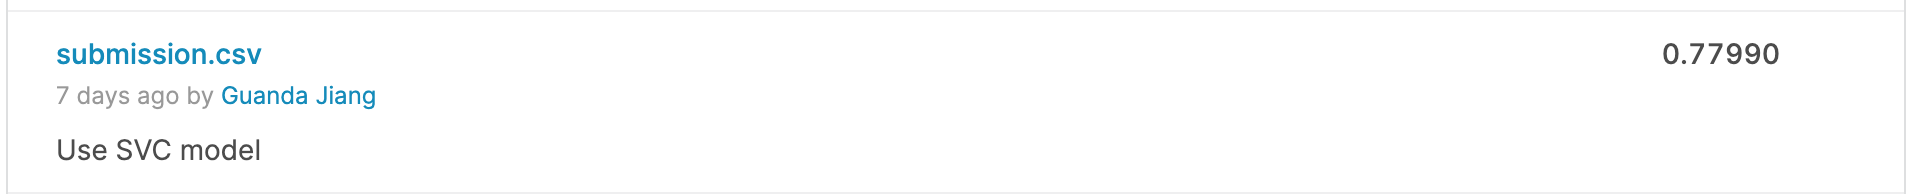

**Submission Date: 12/04\
    Kaggle ID: Guanda Jiang\
        Kaggle Score: 0.77990**

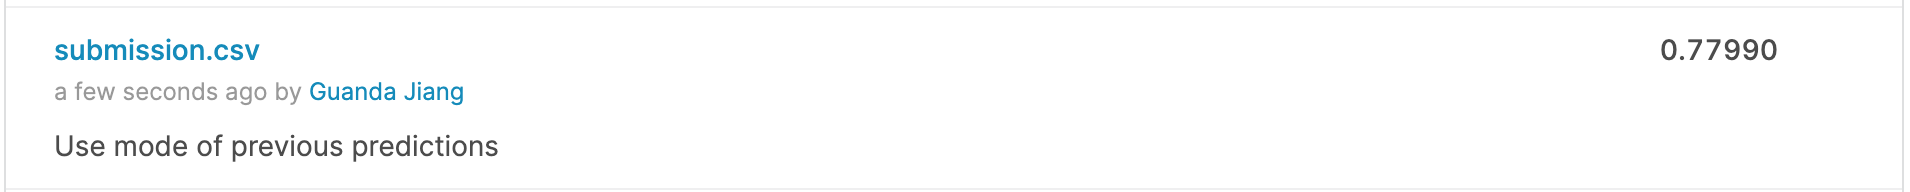